In [1]:
import os

Root= "/home/kunalkumarsahoo/Playground/Research-Work"

In [2]:
os.chdir(Root)  #change directory

In [3]:
# os.getcwd()     #get current working directory

In [4]:
import tensorflow as tf

2022-04-05 12:08:07.878716: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-05 12:08:07.878754: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [5]:
tf.__version__

'2.8.0'

In [6]:
tf.keras.__version__

'2.8.0'

In [7]:
tf.config.list_physical_devices("GPU")   # whether GPU is available or not

2022-04-05 12:08:13.698806: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-05 12:08:13.698843: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-05 12:08:13.698888: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (fedora): /proc/driver/nvidia/version does not exist


[]

In [8]:
# GPU is available indexed at 0 type is also GPU

In [9]:
tf.config.list_physical_devices("CPU")   # whether CPU is available or not

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [10]:
Checklist=["GPU","CPU"]

for device in Checklist:
    out_=tf.config.list_physical_devices(device)
    if len(out_)>0:
        print(f"{device} is available")
        print("details",out_)
    else:
        print(f"{device} is not available")

GPU is not available
CPU is available
details [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
# MNIST dataset - we are going to work with MNIST hand written data set
#each number image is of 28X28 pixels
# total number of classes are 10 (0 to 9)

In [13]:
# mnist= tf.keras.datasets.mnist
mnist= tf.keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test)=mnist.load_data()

In [14]:
X_train_full.shape   #there are 60000 images available

(60000, 28, 28)

In [15]:
y_train_full.shape

(60000,)

In [16]:
X_test.shape      #each train and test image will have 784 columns= 28X28 image pixels

(10000, 28, 28)

In [17]:
y_test.shape

(10000,)

In [18]:
X_train_full.dtype    #datatype is unsigned integer8 each value will vary from 0 to 255 (256 values)

dtype('uint8')

Now we have to Split the whole training set images in to training and validation set. After that we ll divide each pixel value by 255 so that it will range from 0 to 1. Highest value of a pixel is 255. This is otherwise known as Scaling. First 5000 are used for validation and rest are used for training 

In [19]:
X_valid, X_train=X_train_full[:5000]/255.0,X_train_full[5000:]/255.0

In [20]:
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]

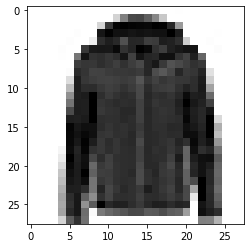

In [21]:
plt.imshow(X_train[0],cmap="binary")
#plt.axis("o")

(-0.5, 27.5, 27.5, -0.5)

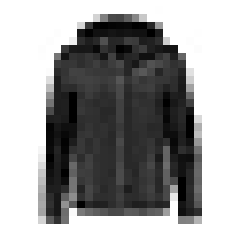

In [22]:
plt.imshow(X_train[0],cmap="binary")
plt.axis("off")  #making index off

<AxesSubplot:>

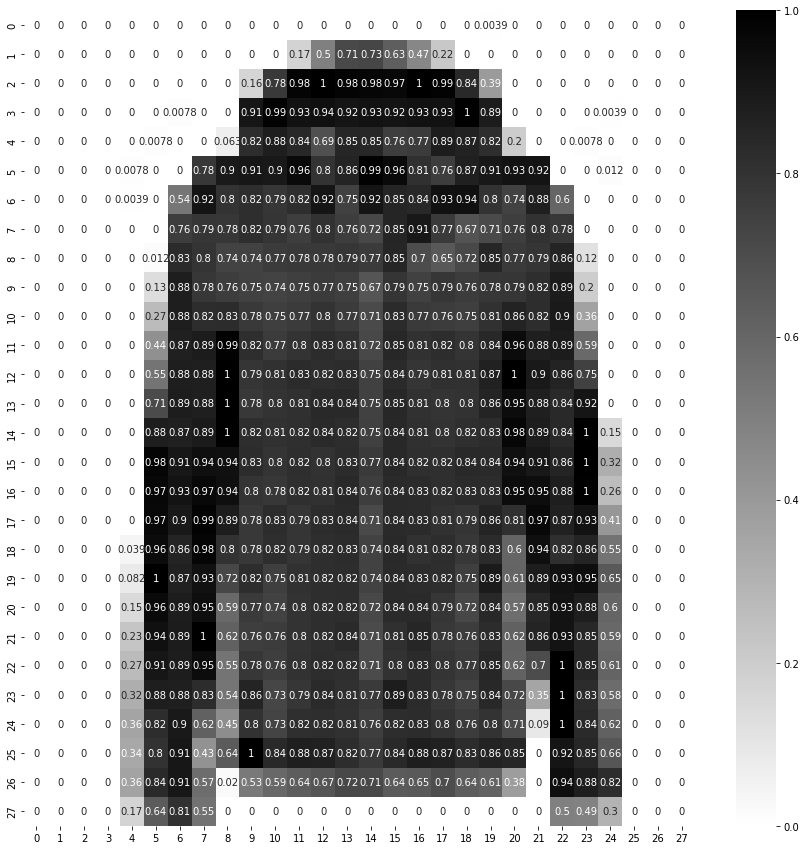

In [23]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(X_train[0],annot=True,cmap='binary')

<AxesSubplot:>

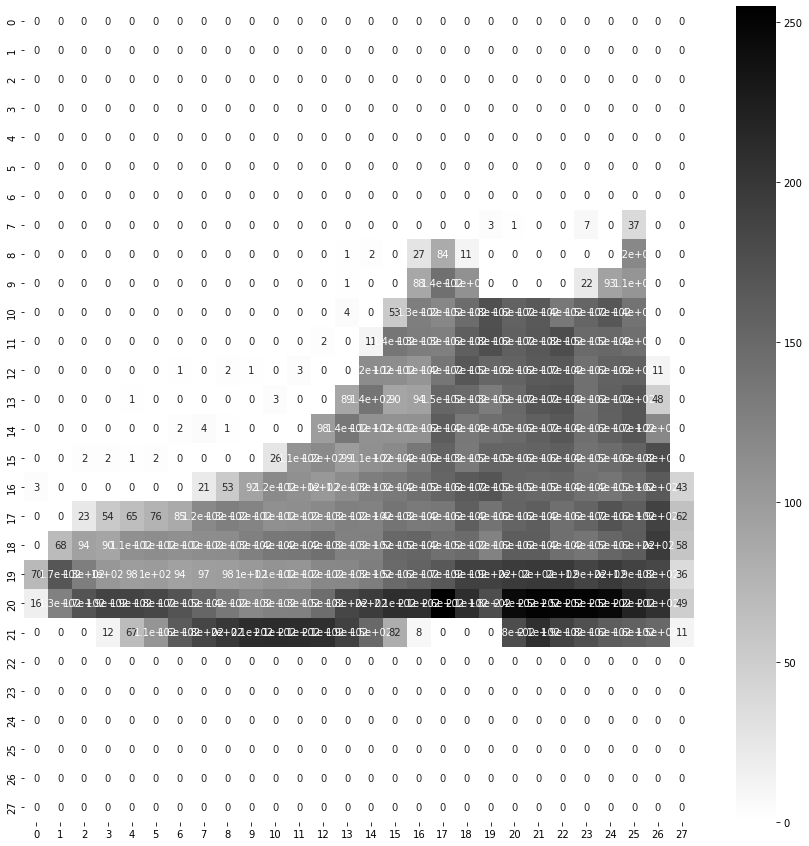

In [24]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(X_test[0],annot=True,cmap='binary')

Now First we have to flatten each image so that it will be converted from 28X28 to 784 one dimensional values.
So our first layer size will be 784= 28X28
Second layer suppose= 300
Third layer=100
Last layer contains 10 neurons representing 0 to 9 all values 

In [25]:
LAYERS=[tf.keras.layers.Flatten(input_shape=[28,28], name="inputLayer"),
        tf.keras.layers.Dense(100,activation="relu",name="hiddenLayer0"),
        tf.keras.layers.Dense(300,activation="relu",name="hiddenLayer1"),
        tf.keras.layers.Dense(300,activation="relu",name="hiddenLayer2"),
        tf.keras.layers.Dense(300,activation="relu",name="hiddenLayer3"), # Added for testing
        tf.keras.layers.Dense(100,activation="relu",name="hiddenLayer4"), # Added for testing
        tf.keras.layers.Dense(50,activation="relu",name="hiddenLayer5"), # Added for testing
        tf.keras.layers.Dense(10,activation="softmax",name="outputLayer")]

In [26]:
model_clf=tf.keras.models.Sequential(LAYERS)

2022-04-05 12:08:38.353376: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [27]:
model_clf.layers

In [28]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer0 (Dense)        (None, 100)               78500     
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               30300     
                                                                 
 hiddenLayer2 (Dense)        (None, 300)               90300     
                                                                 
 hiddenLayer3 (Dense)        (None, 300)               90300     
                                                                 
 hiddenLayer4 (Dense)        (None, 100)               30100     
                                                                 
 hiddenLayer5 (Dense)        (None, 50)                5

In [29]:
784*300+300

235500

In [30]:
#input can be of any number hence None is written.

First layer size 784= 28X28
Second layer 784X300(Second layer size) + 300 Bias
Third Layer 300 X100 + 100 Bias


In [31]:
hidden1=model_clf.layers[1]
hidden1.name

'hiddenLayer0'

In [32]:
model_clf.get_layer(hidden1.name) is hidden1

True

In [33]:
type(hidden1.get_weights())

list

In [34]:
hidden1.get_weights()

[array([[ 0.02987108,  0.05870533, -0.0209977 , ...,  0.03242065,
          0.08039188,  0.03599517],
        [ 0.06316926, -0.04863554,  0.05590695, ...,  0.01671431,
          0.0696124 , -0.05290968],
        [ 0.07128894, -0.01113782,  0.01250046, ...,  0.04968384,
         -0.04805374,  0.01224947],
        ...,
        [ 0.05217752,  0.04892732, -0.01648171, ..., -0.04121461,
          0.08004762, -0.0104969 ],
        [ 0.02475692,  0.0036615 , -0.04367732, ..., -0.0140628 ,
          0.00627538,  0.03804901],
        [-0.03426091, -0.06520326,  0.02815319, ..., -0.06332041,
          0.03460728, -0.03560321]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

Here We have obtained the weights associated with the layer1. Initial set values are the weights associated where as the second set of values '0' are the set of bias weights. Means initial bias weights are 0.

If you want you can set some weights of your wish.

In [35]:
#hidden1.set_weights(hidden.get_weights) #to set weights

In [36]:
weights,biases=hidden1.get_weights()

In [37]:
print("shape\n",weights.shape,"\n")

shape
 (784, 100) 



In [38]:
weights

array([[ 0.02987108,  0.05870533, -0.0209977 , ...,  0.03242065,
         0.08039188,  0.03599517],
       [ 0.06316926, -0.04863554,  0.05590695, ...,  0.01671431,
         0.0696124 , -0.05290968],
       [ 0.07128894, -0.01113782,  0.01250046, ...,  0.04968384,
        -0.04805374,  0.01224947],
       ...,
       [ 0.05217752,  0.04892732, -0.01648171, ..., -0.04121461,
         0.08004762, -0.0104969 ],
       [ 0.02475692,  0.0036615 , -0.04367732, ..., -0.0140628 ,
         0.00627538,  0.03804901],
       [-0.03426091, -0.06520326,  0.02815319, ..., -0.06332041,
         0.03460728, -0.03560321]], dtype=float32)

In [39]:
print("shape\n",biases.shape,"\n")
biases

shape
 (100,) 



array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [52]:
LOSS_FUNCTION="sparse_categorical_crossentropy"  #use=>tf.losses.sparse_categorical_crossentropy
# OPTIMIZER="SGD" #or use with custom learning rate=>tf.keras.optimizers.SGD(0.02)
# OPTIMIZER=tf.keras.optimizers.SGD(learning_rate=0.01)#SGD optimizer
# OPTIMIZER=tf.keras.optimizers.SGD(lr=0.01,momentum=0.9)#momentum optimizer
# OPTIMIZER=tf.keras.optimizers.SGD(learning_rate=0.01,momentum=0.1,nesterov=True)  #nesterov optimizer
OPTIMIZER=tf.keras.optimizers.Adagrad(lr=0.001,initial_accumulator_value=0.1,epsilon=1e-07,name="Adagrad")  #Adagrad Optimizer
METRICS=["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION,
                  optimizer=OPTIMIZER,
                  metrics=METRICS)

/home/kunalkumarsahoo/anaconda3/envs/Deep-Learning/lib/python3.10/site-packages/keras/optimizer_v2/adagrad.py:74: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adagrad, self).__init__(name, **kwargs)


In [53]:
#Alternatively we can also write
#model_clf.compile(loss=tf.losses.categorical_crossentropy, optimizer=tf.keras.optimizer.SGD(0.02), metrics=["accuracy"])

In [54]:
# 1719*30,X_train.shape, 55000/32, batch size=32 by default

In [55]:
EPOCHS=15
VALIDATION_SET=(X_valid,y_valid)

history=model_clf.fit(X_train,y_train,epochs=EPOCHS, validation_data=VALIDATION_SET)

Epoch 1/15
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0706 - accuracy: 0.9749 - val_loss: 0.3606 - val_accuracy: 0.9022
Epoch 2/15
1719/1719 [==============================] - 4s 3ms/step - loss: 0.0641 - accuracy: 0.9788 - val_loss: 0.3813 - val_accuracy: 0.9032
Epoch 3/15
1719/1719 [==============================] - 4s 3ms/step - loss: 0.0613 - accuracy: 0.9790 - val_loss: 0.3812 - val_accuracy: 0.9042
Epoch 4/15
1719/1719 [==============================] - 4s 3ms/step - loss: 0.0592 - accuracy: 0.9804 - val_loss: 0.3839 - val_accuracy: 0.9026
Epoch 5/15
1719/1719 [==============================] - 4s 3ms/step - loss: 0.0574 - accuracy: 0.9810 - val_loss: 0.3869 - val_accuracy: 0.9028
Epoch 6/15
1719/1719 [==============================] - 4s 3ms/step - loss: 0.0558 - accuracy: 0.9818 - val_loss: 0.3940 - val_accuracy: 0.9024
Epoch 7/15
1719/1719 [==============================] - 4s 3ms/step - loss: 0.0545 - accuracy: 0.9822 - val_loss: 0.3968 - val_accuracy:

In [ ]:
# Adagrad -> 86%
# SGD -> 88%
# momentum -> 89%
# nesterov -> 89%

In [ ]:
300*100+100

In [ ]:
import time
import os


def savedModel_path(model_dir="TRAINED_MODEL"):
    os.makedirs(model_dir,exist_ok=True)
    fileName=time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")
    model_path=os.path.join(model_dir, fileName)
    print(f"Model{fileName} will be saved at {model_path}")
    return model_path

In [ ]:
#time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")

In [ ]:
#os.path.join("dir","filename")

In [ ]:
UNIQUE_PATH=savedModel_path()
UNIQUE_PATH

In [ ]:
tf.keras.models.save_model(model_clf,UNIQUE_PATH)

In [ ]:
history.params

In [ ]:
history.history

In [ ]:
pd.DataFrame(history.history)

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
model_clf.evaluate(X_test,y_test)

In [ ]:
X_new=X_test[:3]
y_prob=model_clf.predict(X_new)

y_prob.round(3)

In [ ]:
y_pred=np.argmax(y_prob,axis=-1)
y_pred

In [ ]:
#y_pred=np.argmax(y_prob)
#y_pred

In [ ]:
y_test_new=y_test[:3]
y_test_new

In [ ]:
p=[1,2,3]
q=[4,5,6]
list(zip(p,q))

In [ ]:
p=[1,2,3]
q=[4,5,6]
r=[7,8,9]
for a,b,c in zip(p,q,r):
    print(a,b,c)

In [ ]:
for data,pred,actual in zip(X_new,y_pred,y_test_new):
    plt.imshow(data,cmap="binary")
    plt.title(f"Actual: {actual},Predicted:{pred}")
    plt.axis("off")
    plt.show()
    print("############")


In [ ]:
#to load the model in a seperate file
loaded_model=tf.keras.models.load_model("TRAINED_MODEL/Model_2021_06_02_18_27_36_.h5")   #specify the unique path of the model created above

In [ ]:
loaded_model.evaluate(X_test,y_test)

We can log our values by the help of tensorboard.We can call Tensorboard callback method. Tensor is a good tool to analyze your model.

In [ ]:
#we need to specify a log directory
import time
def get_logpath(log_dir="log/fit"):
    fileName=time.strftime("log_%Y_%m_%d_%H_%M_%S")   #we ll not create any extension here bcoz its a log file
    log_path=os.path.join(log_dir, fileName)
    print(f"saving logs at:{log_path}")
    return log_path

log_dir=get_logpath()
tb_cb=tf.keras.callbacks.TensorBoard(log_dir=log_dir)  #log_dir specifies where you want to put the log


In [ ]:
EPOCHS=10
VALIDATION_SET=(X_valid,y_valid)

history=model_clf.fit(X_train,y_train,epochs=EPOCHS,validation_data=VALIDATION_SET,batch_size=32,callbacks=[tb_cb])

In [ ]:
%load_ext tensorboard

In [ ]:
%tensorboard --logdir logs/fit